# Project Business Statistics: E-news Express_GAP

**Marks: 60**

By: Glen A Patterson

Date: 4-3-2023

## Problem Statment:

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.



## Objective:

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group).  We will explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Data Dictionary:

1. **user_id** - Unique user ID of the person visiting the website
2. **group** - Whether the user belongs to the first group (control) or the second group (treatment)
3. **landing_page** - Whether the landing page is new or old
4. **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page
5. **converted** - Whether the user gets converted to a subscriber of the news portal or not
6. **language_preferred** - Language chosen by the user to view the landing page

## Import all the necessary libraries:

In [62]:
# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# This library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats

# import the required functions
from scipy.stats import ttest_ind
from scipy.stats import t
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

## Reading the Data into a DataFrame:

In [2]:
# Load the csv file and call the dataframe "data"
data = pd.read_csv("abtest.csv")

In [3]:
# Make a copy of original dataframe "data" and call it "df".  We will be modifying this dataframe
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis:

### Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# Observing the first 5 rows of the dataset to make sure it loaded correctly and examine the data.
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Observing the last 5 rows of the dataset and examine the data.
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Get information about the number of rows and columns in the dataset (rows, columns)
df.shape

(100, 6)

- **We can see that there is 100 rows and 6 columns**

In [7]:
# Information on dataset (data types, format, missing data, ect.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- **There is no missing data in this dataset**
- **There is 4.8KB memory used**
- **There is one "float64", one "int64", and four "object" data types**

In [8]:
# See if there is any duplicated rows
df.duplicated().sum()

0

- **There is no duplicated rows in dataset.**

In [9]:
# Explore the Statistics in data and look for outliers in dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Find the number of different groups in this dataset
df["group"].value_counts()

control      50
treatment    50
Name: group, dtype: int64

- There is equal count in both "control" and "treatment" in the groups

In [11]:
# Find the number of different type of landing_page in this dataset
df["landing_page"].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

- There is equal count in both "old" and "new" landing_page in the groups

In [12]:
# Find the number of people that converted to the new landing_page in this dataset
df["converted"].value_counts()

yes    54
no     46
Name: converted, dtype: int64

- There is more people that converted to the new landing_page, but not by much

In [13]:
# Find the different language preferance in this dataset
df["language_preferred"].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

- The language preferance is balanced
- The dataset is pretty balanced overall

## Exploratory Data Analysis

### Univariate Analysis:

In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observation on Group

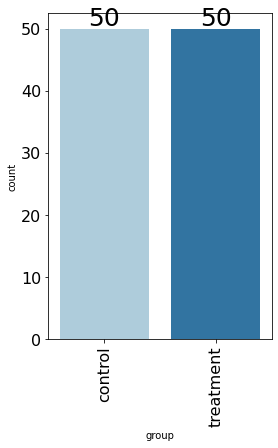

In [15]:
labeled_barplot(df, "group", 1)

- The control size is 50 users
- The treatment size is 50 users
- The sample size is 100 users

#### Observation on landing_page

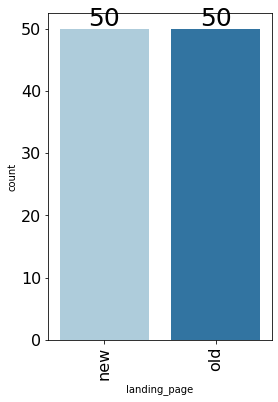

In [16]:
labeled_barplot(df, "landing_page", 1)

- The count for the new landing page is 50
- The count for the old landing page is 50

#### Observation on time_spent_on_the_page

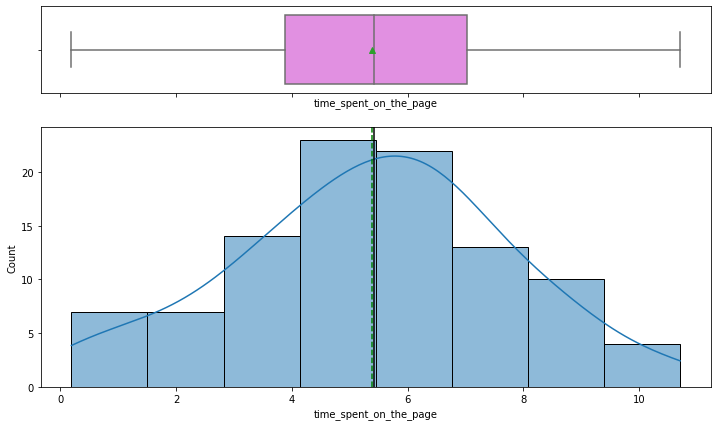

In [17]:
histogram_boxplot(df, "time_spent_on_the_page")

- The lowest time spent on the landing page is 0.2 minutes and at most is 10.7 minutes, with a median of 5.4 minutes
- The time spent on the landing page are close to normal distribution
- The IQR is between 3.9 and 7.0 minutes with a mean of 5.4 minutes on the landing page
- There is no outliers in the time spent on the landing page

#### Observation on converted

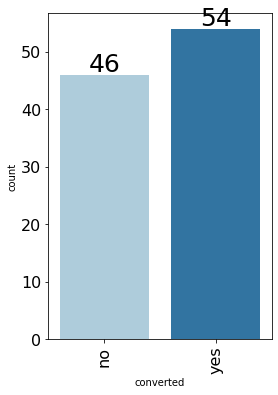

In [18]:
labeled_barplot(df, "converted", 1)

- 54 of the users gets converted as a subscriber of the news portal
- 46 of the users do not gets converted as a subscriber of the news portal

#### Observation on language_preferred

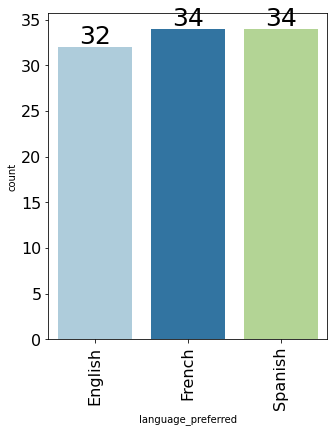

In [19]:
labeled_barplot(df, "language_preferred", 1)

- 32 users choose English as the language to view the landing page
- 34 users choose French as the language to view the landing page
- 34 users choose Spanish as the language to view the landing page

### Bivariate Analysis:

In [20]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target, figuresize=3):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, figuresize * 5))
    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", prop={"size": 30}, bbox_to_anchor=(1, 1))
    plt.show()


# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()

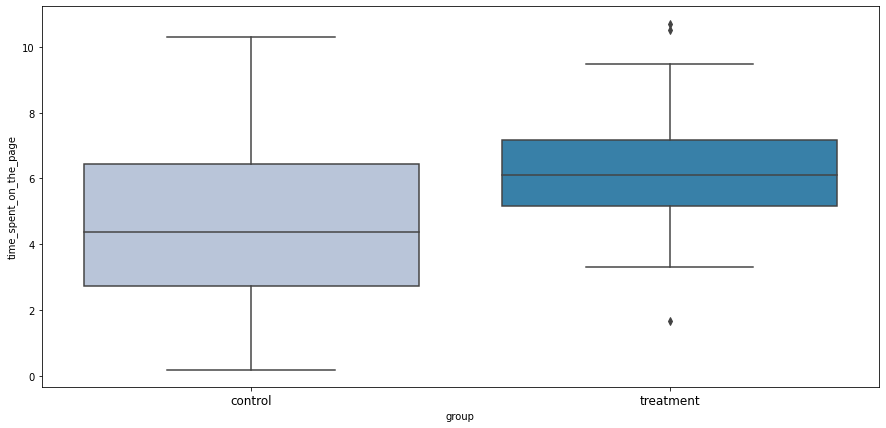

In [21]:
# Group vs Time spent on the page
boxplot_chart(df, "group", "time_spent_on_the_page")

- It looks like treatment users spend more time on the landing page than control users, further statistical analysis is needed

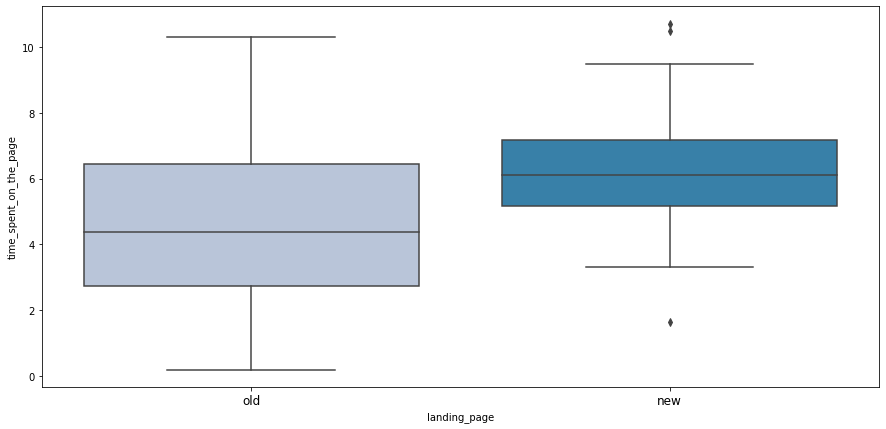

In [22]:
# Landing page vs Time spent on the page
boxplot_chart(df, "landing_page", "time_spent_on_the_page")

- It looks like users spend more time on the new landing page than the existing landing page, further statistical analysis is needed

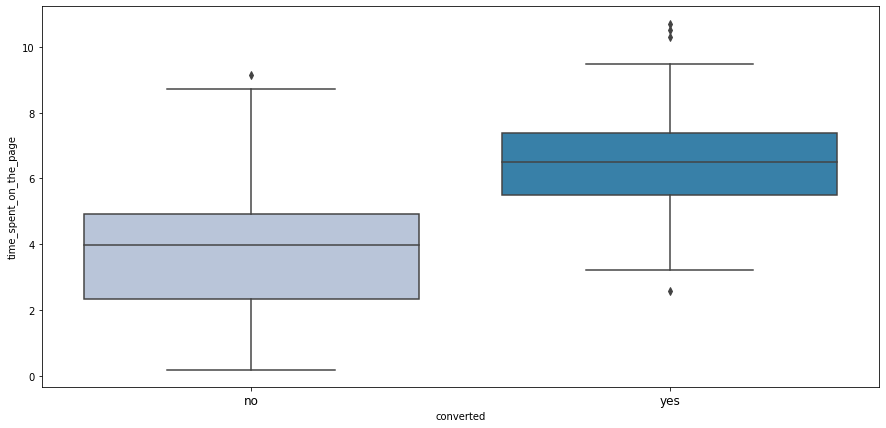

In [23]:
# Conversion status vs Time spent on the page
boxplot_chart(df, "converted", "time_spent_on_the_page")

- It looks like users gets converted to a subscriber of the news portal, further statistical analysis is needed

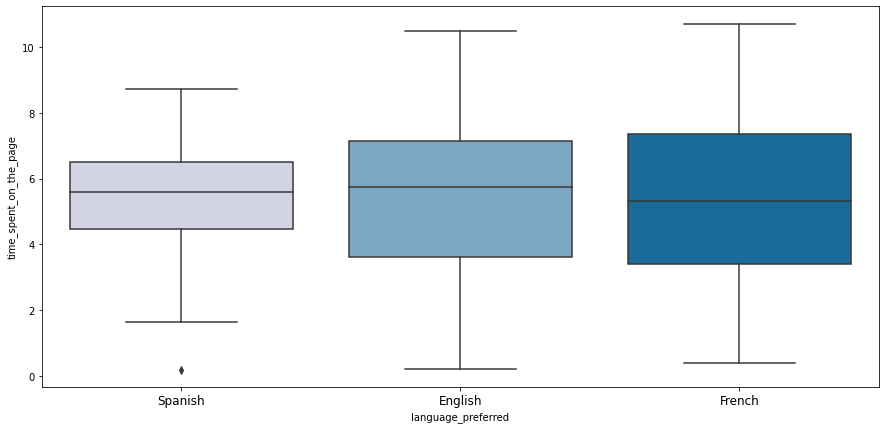

In [24]:
# Language preferred vs Time spent on the page
boxplot_chart(df, "language_preferred", "time_spent_on_the_page")

- It looks like different language users does not affect time spent on the landing page, further statistical analysis is needed

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

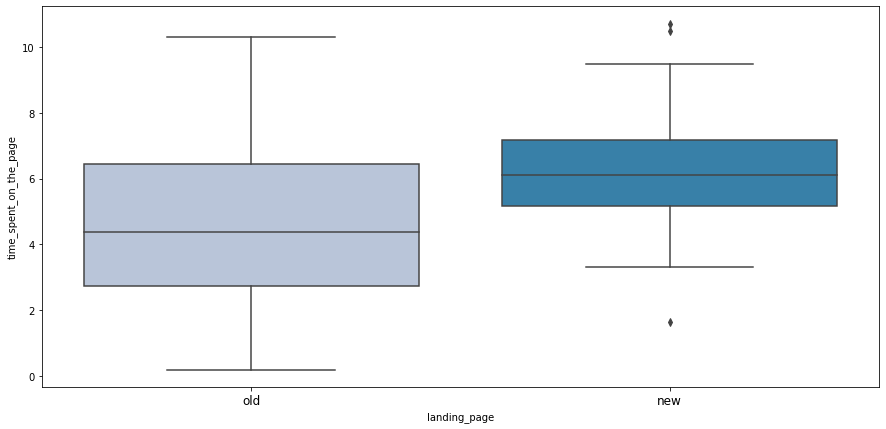

In [25]:
# visual analysis of the time spent on the new page and the time spent on the old page
boxplot_chart(df, "landing_page", "time_spent_on_the_page")

### Step 1: Define the null and alternate hypotheses

$H_0:$ new page = old page

$H_a:$ new page > old page

### Step 2: Select Appropriate test

- This is a one-tailed test.
- We are comparing the sample means from two independent population groups.
- The population standard deviations are unknown.
- **This is a 2-sample independent t-test.**

### Step 3: Decide the significance level

- As stated in the project objectives, we are selecting a significance level of 5%. ($\alpha = 0.05$)

### Step 4: Collect and prepare data

In [26]:
# create a data frame for new landing page users
time_spent_new = df[df["landing_page"] == "new"]["time_spent_on_the_page"]

# create a data frame for old landing page users
time_spent_old = df[df["landing_page"] == "old"]["time_spent_on_the_page"]

In [27]:
# Printing the sample standard deviations
print(
    "The sample standard deviation of the time spent on the new page is:",
    round(time_spent_new.std(), 3),
)
print(
    "The sample standard deviation of the time spent on the old page is:",
    round(time_spent_old.std(), 3),
)

The sample standard deviation of the time spent on the new page is: 1.817
The sample standard deviation of the time spent on the old page is: 2.582


- The sample standard deviation is unequal

### Step 5: Calculate the p-value

In [67]:
# calculating the p-value
test_stat, p_value = ttest_ind(
    time_spent_new, time_spent_old, equal_var=False, alternative="greater"
)

print("Test Statistic =",test_stat)
print("The p-value =", p_value)

Test Statistic = 3.7867702694199856
The p-value = 0.0001392381225166549


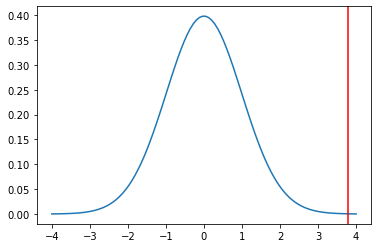

In [34]:
# plot the test-stat distribution

# plotting the distribution of t test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, t.pdf(x,df=len(df)-1)) # plot the pdf of the t distribution with n-1 degrees of freedom
plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(
        f"The p-value {p_value} is less than the significance level of 5%, so we reject the null hypothesis."
    )
else:
    print(
        f"The p-value {p_value} is greater than the significance level of 5%, so we fail to reject the null hypothesis."
    )

The p-value 0.0001392381225166549 is less than the significance level of 5%, so we reject the null hypothesis.


### Step 7:  Draw inference

- **As the p-value(0.0001) is much less than the significance level of 5%, we can reject the null hypothesis. Hence, we have enough significance to conclude that there is more time spend on the new landing page than the old one.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

converted     no  yes  All
landing_page              
All           46   54  100
old           29   21   50
new           17   33   50
------------------------------------------------------------------------------------------------------------------------


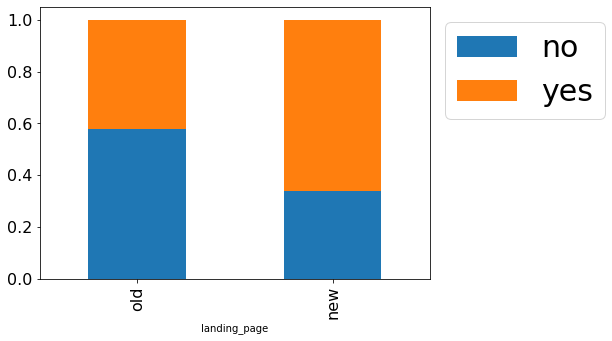

In [30]:
# Visually comparing the conversion rate for the new page and the conversion rate for the old page
stacked_barplot(df, "landing_page", "converted", 1)

### Step 1: Define the null and alternate hypotheses

$H_0:$  conversion rate for the new page (treatment group) = conversion rate for the old page (control group)

$H_a:$ conversion rate for the new page (treatment group) > conversion rate for the old page (control group)

### Step 2: Select Appropriate test

- This is a one-tailed test 
- concerning two population proportions from two independent populations.
- **This is a 2-sample z-test.**

### Step 3: Decide the significance level

- As stated in the project objectives, we are selecting a significance level of 5%. ($\alpha = 0.05$)

### Step 4: Collect and prepare data

In [41]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
print(f"There are {new_converted} converted users in the treatment group")

# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print(f"There are {old_converted} converted users in the control group")

# total number of users in the treatment group
num_treatment = df['group'].value_counts()['treatment']
print(f"There are {num_treatment} users on the new page (treatment group)")

# total number of users in the control group
num_control = df['group'].value_counts()['control']
print(f"There are {num_control} users on the old page (control group)")

There are 33 converted users in the treatment group
There are 21 converted users in the control group
There are 50 users on the new page (treatment group)
There are 50 users on the old page (control group)


### Step 5: Calculate the p-value

In [69]:
# find the test_stat and p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [num_treatment, num_control], alternative ='larger')
print('Test Statistic = ' + str(test_stat))
print('p-value = ' + str(p_value))

Test Statistic = 2.4077170617153842
p-value = 0.008026308204056278


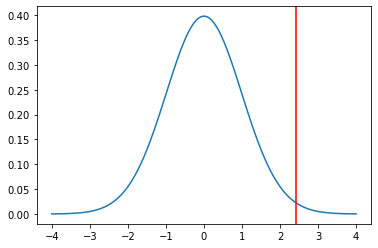

In [44]:
# plot the test-stat distribution

# plotting the distribution of t test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, t.pdf(x,df=len(df)-1)) # plot the pdf of the t distribution with n-1 degrees of freedom
plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

### Step 6: Compare the p-value with $\alpha$

In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(
        f"The p-value {p_value} is less than the significance level of 5%, so we reject the null hypothesis."
    )
else:
    print(
        f"The p-value {p_value} is greater than the significance level of 5%, so we fail to reject the null hypothesis."
    )

The p-value 0.008026308204056278 is less than the significance level of 5%, so we reject the null hypothesis.


### Step 7:  Draw inference

- **As the p-value(0.008) is much less than the significance level of 5%, we can reject the null hypothesis. Hence, we have enough significance to conclude that conversion rate for the new page (treatment group) is greater than the conversion rate for the old page (control group)**

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

converted           no  yes  All
language_preferred              
All                 46   54  100
French              19   15   34
Spanish             16   18   34
English             11   21   32
------------------------------------------------------------------------------------------------------------------------


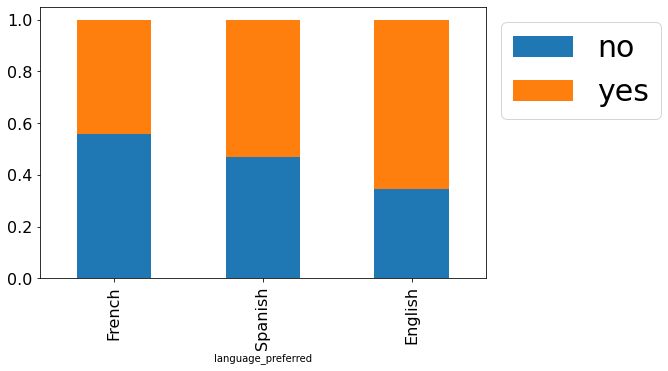

In [46]:
# Visually comparing language preferred with the converted status
stacked_barplot(df, "language_preferred", "converted", 1)

### Step 1: Define the null and alternate hypotheses

$H_0:$  The language preferred and the conversion status are independent of each other

$H_a:$  The language preferred and the conversion status are dependent on each other

### Step 2: Select Appropriate test

- This is a test of independence
- concerning two categorical variables - preferred language and converted status.
- **This is a Chi-Square Test of Independence.**


### Step 3: Decide the significance level

- As stated in the project objectives, we are selecting a significance level of 5%. ($\alpha = 0.05$)

### Step 4: Collect and prepare data

In [47]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df["language_preferred"], df["converted"])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [48]:
# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [49]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(
        f"The p-value {p_value} is less than the significance level of 5%, so we reject the null hypothesis."
    )
else:
    print(
        f"The p-value {p_value} is greater than the significance level of 5%, so we fail to reject the null hypothesis."
    )

The p-value 0.2129888748754345 is greater than the significance level of 5%, so we fail to reject the null hypothesis.


### Step 7:  Draw inference

- **As the p-value(0.213) is much greater than the significance level of 5%, we fail to reject the null hypothesis. Hence, we do NOT have enough statistical significance to conclude that the language preferred and the conversion status are dependent of each other.**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [53]:
# create a new variable for all users who are part of the treatment group
df_new = df[df['landing_page'] == 'new']
df_new

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


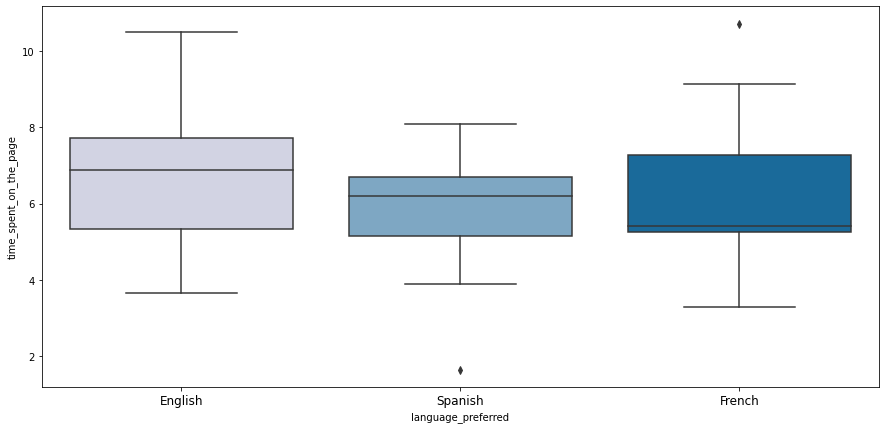

In [55]:
# Plots of the time spent on the new page for different language users
boxplot_chart(df_new, 'language_preferred', 'time_spent_on_the_page')

In [54]:
# Calculating the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$  Mean time spent on the new page for the different language users are ALL equal.    $\mu_1 = \mu_2 = \mu_3$

$H_a:$  Mean time spent on the new page for at least one language user with respect to the three languages is different.

### Step 2: Select Appropriate test

- Concerning three population means comparison
- **This is a One-way ANOVA test**

### Step 3: Decide the significance level

- As stated in the project objectives, we are selecting a significance level of 5%. ($\alpha = 0.05$)

### Hypothesis Testing

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the new page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new page do not not follow a normal distribution

In [72]:
# Assumption 1: Normality

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('p-value =', p_value)

p-value = 0.5643684267997742


- **Since p-value of the test is larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.**

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [73]:
#Assumption 2: Homogeneity of Variance

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
print('p-value =', p_value)

p-value = 0.46711357711340173


- **Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.**
- **We can continue with the One-way ANOVA test.** 

### Step 4: Collect and prepare data

In [56]:
# Create separate variables to store the time spent on the new page with respect to the three language users 
time_spent_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [71]:
# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_Spanish, time_spent_French)
print('Test Statistic =', test_stat)
print('p-value =', p_value)

Test Statistic = 0.8543992770006822
p-value = 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [65]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(
        f"The p-value {p_value} is less than the significance level of 5%, so we reject the null hypothesis."
    )
else:
    print(
        f"The p-value {p_value} is greater than the significance level of 5%, so we fail to reject the null hypothesis."
    )

The p-value 0.43204138694325955 is greater than the significance level of 5%, so we fail to reject the null hypothesis.


### Step 7:  Draw inference

- **As the p-value(0.432) is much greater than the significance level of 5%, we fail to reject the null hypothesis. Hence, we do NOT have enough statistical significance to conclude that the mean time spent on the new page for three languages is different.  So $\mu_1 = \mu_2 = \mu_3$**

## Conclusion and Business Recommendations

- There was enough statistical evidence to say that users spend more time on the new landing page than the existing landing page.
- There was enough statistical evidence to say that new page users have a greater chance to gets converted to a subscriber of the news portal than the conversion rate for the old page.
- The preferred language of the user and the chance to gets converted to a subscriber are independent of each other.
- The mean time spent on the new landing page is the same for all three languages. (English, Spanish, French)
- It was observed that the new page will result in higher subscribers and longer viewing time, so it is suggested that the business start using only the new landing page from now on.
- Further statistical analysis can be done on improving the impact on the business in the future.
- Such improvements can on responsive mobile-friendly tests, focus on the user experience, and increase on customer traffic, No Ads or Popups for subscibers, and make sure new page is fast and reliable for all users.